<a href="https://colab.research.google.com/github/MrLuksR/Challenge---Titanic-Prediction/blob/main/Challenge_Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de Datos - Challenge Titanic Prediction

## Importación del archivo de entrenamiento
Aquí se importa el archivo de entrenamiento mediante el uso de la biblioteca pandas, con la finalidad de tener una visión general sobre el contenido del mismo.

In [87]:
import pandas as pd

df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cambio de datos en la columna 'sex' (sexualidad)
Se cambiaron los valores de *male* y *female*, referentes a masculino y femenino, a 1 para masculino y 0 para femenino.

In [88]:
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Visión del tamaño del archivo y sus columnas
Esto se realizó a fin de obtener una visión geral del tamaño del archivo (en columnas) y evaluar si existen datos faltantes (datos NULL).

In [89]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Contabilidad de datos NULL
Se realiza una lectura de los datos faltantes dentro de cada columna.

In [90]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Cambio en los datos de la columna 'Age'
'Age' es una columna de suma importancia a la hora de generar el modelo de predicción y gracias a los métodos utilizados anteriormente se contabilizaron 177 datos NULL dentro de esa columna. Se seleccióno un método para generar estos datos faltantes, siendo este el método de *promedio*, cuya finalidad es dar un valor a estos mediante el uso de un promedio tomado a partir de los demás datos.

In [91]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-4086271142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Eliminación de la columna 'Cabin'
En base al tamaño del archivo y la cantidad de datos dentro del mismo, se determinó que la mejor decisión para entrenar el modelo sin entorpecer sus predicciones, es eliminar esta columna.

In [92]:
df.drop(columns='Cabin', inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Cambio en los datos de la columna 'Embarked'
Se comprobó que existen 2 datos faltantes dentro de esta columna, entonces se tomó la decisión de usar otro método para llenar estos espacios: el uso del método de la *moda* que utiliza el valor qué más se repite dentro de las columnas para aplicar a los faltantes.

In [93]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-1025092037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Generación de gráfica para la columna 'Age'
Antes de realizar esta gráfica, mediante el uso del método *head* para visualizar los datos, se determinó que para esta columna, referente a las edades, existen valores decimales. Consecuentemente y con la finalidad de que estos valores sean legibles de manera sencilla, se graficó esta columna.

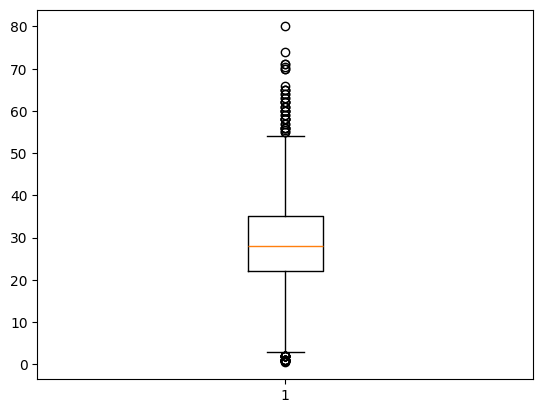

In [94]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

## Redondear valores decimales en 'Age'
Luego de checar que las variables eran decimales con valores medios en ellas, se utilizó el método *round* a fin de integrar dentro de esa columna los mismos valores pero redondeados a un numero superior. Dato: en la gráfica se ven valores fuera de lo común debido que hay edades que siguen siendo decimales, pero sin valor (ej. age: 20.00).

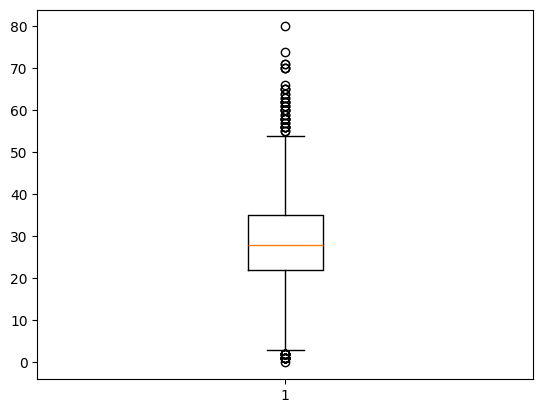

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [95]:
df['Age'] = df['Age'].round()
plt.boxplot(df['Age'])
plt.show()
df.head()

## Toma de variables para el entrenamiento del modelo
Se tomaron 3 columnas principales (a criterio del creador) como variables independientes para entrenar el modelo. Estas columnas son: 'Age' - edad, 'SibSp' - relaciones familiares y 'Sex' - el género de la persona. Y como variable objetivo, en donde se va a basar la predicción del modelo, se tomó la columna 'Survived'. Las variables independientes se almacenaron dentro de una lista llamada *caract* (características) y la variable objetivo directamente en en y.

In [96]:
caract = ['Age', 'SibSp', 'Sex']

X = df[caract]
y = df['Survived']

## Importación de ejes de entrenamiento
Se importó la librería referente al modelo de entrenamiento y testeo en donde se aplicaron las variables anteriores.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Importación de StandardScaler (escalador estándar)
Esto se toma a fin de estandarizar los valores y obtener un resultado óptimo.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Importación del modelo a entrenar KNeighborsClassifier (modelo en base a vecinos)
Una vez importado, se crea una variable llamada modelo, la cual contiene las vriables de entrenamiento y se la escala utilizando el método *fit*. Luego se crea otra variable llamada *predict* que contiene el modelo de predicción en base a los valores de X, aplicadas a partir de los pasos anteriores. Luego utilizando *accuracy_score* para evaluar el rendimiento del modelo de clasificación. Finalmente se imprime este resultado, dando un valor aproximado entre 0.74 y 0.79.

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

predict = modelo.predict(X_val)
accuracy = accuracy_score(y_val, predict)

print('Exactitud en el conjunto de validación:', accuracy)

Exactitud en el conjunto de validación: 0.7877094972067039


## Importación de los datos de testeo
Se tomó otro archivo cuyos valores sirven para crear un documento de presentación del desafío. De igual manera como en el primer paso del archivo anterior, se realizó la importación del archivo dentro de una variable y de igual manera se cambiaron los valores de la columna 'Sex'.

In [100]:
test_data = pd.read_csv('test.csv')
test_data.head()
test_data['Sex'] = test_data['Sex'].map({'male' : 1, 'female' : 0})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


## Visualización de datos faltantes (datos NULL)
Se utilizaron los mismo métodos para visualizar y contabilizar los valores faltantes dentro de este nuevo archivo.

In [101]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## Cambio de datos en columna 'Age'
De igual manera como en el archivo anterior, se utilizó el método *median* para llenar esos valores vacíos dentro de esta columna.

In [102]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data.isnull().sum()

/tmp/ipython-input-1375108037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## Cambio en los datos de la columna 'Fare'
Se comprobó que en la columna 'Fare' faltaban 2 valores, se utilizó el método *mode* para llenar estos espacios.

In [103]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)
test_data.isnull().sum()

/tmp/ipython-input-238322860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


## Eliminación de la columna 'Cabin'
Luego de visualizar el tamaño del archivo, se tomó la decisión de eliminar esta columna al igual que en la anterior.

In [104]:
test_data.drop(columns='Cabin', inplace=True)
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


## Redondeo de valores en colummna 'Age'
De igual forma que se aplicó en los valores anteriores, los datos decimales de esta columna fueron redondeados.

In [105]:
test_data['Age'] = test_data['Age'].round()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C


## Creación del modelo de predicción
Finalmente se creó el modelo de predicción, se generó un archivo y se envió a la página del desafío

In [106]:
X_data_val = test_data[caract]
X_data_val = scaler.fit_transform(X_data_val)

predict = modelo.predict(X_data_val)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predict})
output.to_csv('submission3.csv', index=False)

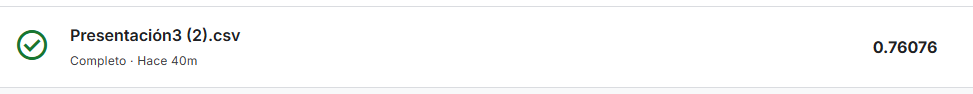

Este fué el resultado de la predicción.